## **hulu**

### 1. Exploración y Preparación de los Datos

Datos descargados de Kaggle

(Mismo código en todos los notebooks de datos)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
data_hulu = pd.read_csv('../src:data/Data_Hulu/datos_hulu.csv')

print("Filas, columnas:", data_hulu.shape)
data_hulu.head()

Filas, columnas: (2398, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20475,Saturday Night Live,SHOW,A late-night live television sketch comedy and...,1975,TV-14,89,"['music', 'comedy']",['US'],47.0,tt0072562,8.0,47910.0,54.345,6.9
1,ts20413,M*A*S*H,SHOW,The 4077th Mobile Army Surgical Hospital is st...,1972,TV-PG,26,"['war', 'comedy', 'drama']",['US'],11.0,tt0068098,8.4,55882.0,27.308,8.0
2,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,tt0043208,8.5,25944.0,17.088,8.1
3,ts20669,Taxi,SHOW,"Louie De Palma is a cantankerous, acerbic taxi...",1978,TV-PG,25,"['drama', 'comedy']",['US'],5.0,tt0077089,7.7,13379.0,14.346,7.3
4,ts21049,The Mary Tyler Moore Show,SHOW,30-year-old single Mary Richards moves to Minn...,1970,TV-PG,28,['comedy'],['US'],7.0,tt0065314,8.2,8692.0,9.290,7.5


In [3]:
# Tipo de dato
data_hulu.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [4]:
# Missings

data_hulu.isna().sum()

id                         0
title                      0
type                       0
description               13
release_year               0
age_certification        685
runtime                    0
genres                     0
production_countries       0
seasons                 1068
imdb_id                  135
imdb_score               166
imdb_votes               167
tmdb_popularity           50
tmdb_score               160
dtype: int64

In [5]:
#Nulls en porcentaje
for i in data_hulu.isna().sum():
    print((i/data_hulu.shape[0])*100)

#Destacamos que el 44% de los valores de la columna season son nulos, pero como representan el numero de temporadas, no nos importa mucho, y podría tener sentido

0.0
0.0
0.0
0.542118432026689
0.0
28.565471226021682
0.0
0.0
0.0
44.5371142618849
5.629691409507923
6.922435362802336
6.964136780650543
2.0850708924103416
6.672226855713094


<AxesSubplot:>

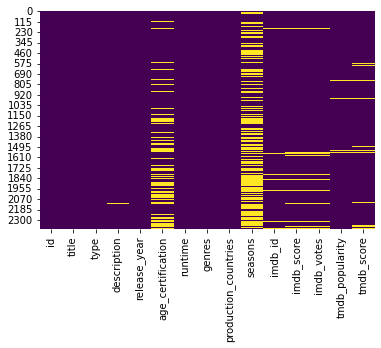

In [6]:
sns.heatmap(data_hulu.isnull(),cbar=False,cmap='viridis')

1.2. Columnas

- ID: ID del título en JustWatch

- title: nombre del título

- show type: SHOW o MOVIE - diferenciación entre pelicula o serie

- description: breve descripción

- release year: año de estreno

- age certification: orientacion a padres de edad mínima recomendada

- runtime: duración

- genres: lista de géneros

- production countries: lista de países que produjeron el título

- seasons: número de temporadas

- IMDB ID: ID del título en IMDB

- IMDB Score: puntuación en IMDB

- IMDB Votes: votos en IMDB

- TMDB Score: puntuación en TMDB

- TMDB Popularity: popularidad en TMDB

    La métrica de popularidad de TMDB se mide -diariamente- en función de los parámetros:
    - N de votos al día
    - N vistas de pág al día    
    - N usuarios que marcan el título como favorito    
    - Fecha de estreno +  fecha de emisión del último/nuevo episodio    
    - N total de votos
    - Puntuación de los días anteriores

In [7]:
print(data_hulu.columns)
print("N columnas:", len(data_hulu.columns))

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')
N columnas: 15


In [8]:
# Título
# Cada título representa un contenido 'único' de la plataforma
# Comprobamos que no haya duplicados --> ya sabemos que no hay nulos

print('Tipo de dato:', data_hulu['title'].dtype)
titulos_duplicados = data_hulu.loc[data_hulu.duplicated(['title'])]
print("n titulos duplicados:", titulos_duplicados.shape[0])
titulos_unicos = data_hulu['title'].nunique()
print("valores repetidos:", data_hulu.shape[0] - titulos_unicos)

Tipo de dato: object
n titulos duplicados: 19
valores repetidos: 19


In [9]:
# Tenemos 134 titulos duplicados, pero esto no indica que sean la misma película/serie
# Comprobamos duplicados que coincidan en título, tipo de contenido, año de estreno y duración:

print("n duplicados:", data_hulu[data_hulu.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])
data_hulu[data_hulu.duplicated(subset=['title', 'type', 'release_year', 'runtime'])]

n duplicados: 1


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1991,ts226757,My Little Pony: Pony Life,SHOW,"A look at the funny side of friendship, with t...",2020,TV-Y7,11,"['animation', 'comedy', 'family', 'fantasy', '...",['US'],2.0,tt11281876,4.8,434.0,NaN,NaN


In [10]:
#Buscamos el valor duplicado
data_hulu[data_hulu['title'] == "My Little Pony: Pony Life"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1799,ts250933,My Little Pony: Pony Life,SHOW,A look at the funny side of friendship. The ne...,2020,NaN,11,[],['US'],2.0,NaN,NaN,NaN,14.87,5.3
1991,ts226757,My Little Pony: Pony Life,SHOW,"A look at the funny side of friendship, with t...",2020,TV-Y7,11,"['animation', 'comedy', 'family', 'fantasy', '...",['US'],2.0,tt11281876,4.8,434.0,NaN,NaN


In [11]:
# Comprobamos que es duplicado, sin embargo, el primero de la lista tiene mucha menos info que el segundo:
# 1 - le añadimos la info de tmdb que no tiene el segundo al  primero al segundo
# 2 - eliminamos el primer valor

data_hulu.iloc[1991, -2] = data_hulu.iloc[1799, -2]
data_hulu.iloc[1991, -1] = data_hulu.iloc[1799, -1]

# comprobamos cambio valores tmdb ok:
data_hulu[data_hulu['title'] == "My Little Pony: Pony Life"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1799,ts250933,My Little Pony: Pony Life,SHOW,A look at the funny side of friendship. The ne...,2020,NaN,11,[],['US'],2.0,NaN,NaN,NaN,14.87,5.3
1991,ts226757,My Little Pony: Pony Life,SHOW,"A look at the funny side of friendship, with t...",2020,TV-Y7,11,"['animation', 'comedy', 'family', 'fantasy', '...",['US'],2.0,tt11281876,4.8,434.0,14.87,5.3


In [12]:
# Eliminamos fila 1799 con el título repetido
# Reseteamos el indice para que no haya saltos
data_hulu1 = data_hulu.drop_duplicates(subset=['title', 'type', 'release_year', 'runtime'], keep="last").reset_index(drop = True).copy()

In [13]:
# Comprobamos que ya no tenemos duplicados:
print("n duplicados:", data_hulu1[data_hulu1.duplicated(subset=['title', 'type', 'release_year', 'runtime'])].shape[0])

n duplicados: 0


In [14]:
# Eliminamos las columnas con el id de Imdb ya que no hemos sacado informacion de estas webs - más allá de la ya dada en el dataset
# Tampoco vamos a utilizar en este análisis la descripción de las películas
# Mantenemos tanto la valoración de imdb como de tndm porque al pertenecer imdb a amazon podría haber datos sesgados

data_hulu2 = data_hulu1.drop(['imdb_id', 'description'], axis=1).copy()
print("N columnas:", data_hulu2.shape[1])
data_hulu2.head()

N columnas: 13


,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20475,Saturday Night Live,SHOW,1975,TV-14,89,"['music', 'comedy']",['US'],47.0,8.0,47910.0,54.345,6.9
1,ts20413,M*A*S*H,SHOW,1972,TV-PG,26,"['war', 'comedy', 'drama']",['US'],11.0,8.4,55882.0,27.308,8.0
2,ts20005,I Love Lucy,SHOW,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,8.5,25944.0,17.088,8.1
3,ts20669,Taxi,SHOW,1978,TV-PG,25,"['drama', 'comedy']",['US'],5.0,7.7,13379.0,14.346,7.3
4,ts21049,The Mary Tyler Moore Show,SHOW,1970,TV-PG,28,['comedy'],['US'],7.0,8.2,8692.0,9.290,7.5


In [15]:
# Comprobamos que la columna id tiene valores únicos para cada título 
# --> por si lo necesitásemos a la hora de juntar las tablas de todas las plataformas y diferenciar por contenido exclusivo 
# (por eso no eliminamos esta columna)
print("Valores unicos:", data_hulu2['id'].nunique())
print("n filas:", data_hulu2['id'].shape[0])

Valores unicos: 2397
n filas: 2397


In [16]:
# Comprobamos los valores de la vble type y nos aseguramos que es de tipo string
# --> La utilizaremos para diferenciar los títulos
data_hulu2['type'] = data_hulu2['type'].astype(str)
data_hulu2['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [17]:
#Creamos la columna década (tiene más sentido para clasificar el contenido)

decadas = (10 * (data_hulu2['release_year'] // 10)).astype(str) + 's'
data_hulu2.insert(4, 'Decada', decadas)

#Eliminamos la columna release_year
del data_hulu2['release_year']

In [18]:
df_decadas_hulu = pd.DataFrame(data_hulu2['Decada'].value_counts())
total = df_decadas_hulu['Decada'].sum()
df_decadas_hulu['total'] = [round((i/total)*100, 2) for i in df_decadas_hulu['Decada']]
df_decadas_hulu


,Decada,total
2010s,1321,55.11
2020s,534,22.28
2000s,358,14.94
1990s,132,5.51
1980s,36,1.50
1970s,10,0.42
1960s,4,0.17
1950s,2,0.08


In [19]:
# age_certificacion --> 28% valores nulos
print("Valores NaN:", len(data_hulu2[data_hulu2['age_certification'].isna() == True]))
print("Valores:", len(data_hulu2[data_hulu2['age_certification'].isna() != True]))
#vemos variables para redefinirlas
print("Valores Columna Edad:", data_hulu2['age_certification'].unique())

Valores NaN: 684
Valores: 1713
Valores Columna Edad: ['TV-14' 'TV-PG' 'TV-G' nan 'PG' 'G' 'R' 'PG-13' 'TV-Y7' 'TV-MA' 'TV-Y'
 'NC-17']


In [20]:
# Redefinimos los valores

"""
- G:        > 0 - Todas las edades
- TV-G:     > 0 - 
- TV-Y:     < 6 años 
- TV-Y7:    < 7 años 
- TV-PG:    < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG:       < Puede ser inadecuado para niños sin la guía de un padre  (lo definimos como para mayores de 13) 
- PG-13:    > 13
- TV-14:    > 14 
- R:        > 17 - Restringido
- NC-17:    > 17 - No se admiten menores de 17
- TV-MA     > 17 

- Límites:
    0 (años) = todos los públicos
    7 (años) = + 7 años
    13 (años) = + 13 años
    17 (años) = + 17 años

Tenemos 2609 valores numeros --> le asignamos el numero 9999 (no podemos eliminarlos)
"""

data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "G", 0, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "TV-G", 0, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "TV-Y", 7, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "TV-Y7", 7, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "TV-PG", 7, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "PG", 7, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "PG-13", 13, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "TV-14", 13, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "R", 17, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "NC-17", 17, data_hulu2['age_certification'])
data_hulu2['age_certification'] = np.where(data_hulu2['age_certification'] == "TV-MA", 17, data_hulu2['age_certification'])

# Asignamos el numero 9999 a los valores nulos:
data_hulu2['age_certification'] = data_hulu2['age_certification'].fillna(9999)

print("Valores Columna Edad:", data_hulu2['age_certification'].unique())

Valores Columna Edad: [  13    7    0 9999   17]


In [21]:
df_edades_hulu = pd.DataFrame(data_hulu2['age_certification'].value_counts())
total = data_hulu2['age_certification'].value_counts().sum()
df_edades_hulu['total'] = [round((i/total)*100, 2) for i in df_edades_hulu['age_certification']]
df_edades_hulu

,age_certification,total
13,705,29.41
9999,684,28.54
17,600,25.03
7,342,14.27
0,66,2.75


In [22]:
#Comprobamos numero de listas vacías en columna genres

nan_genres = 0
for i in data_hulu2['genres']:
    if "[]" in i:
        nan_genres +=1
print("N NaN en 'genres':", nan_genres)
print("% NaN en 'genres':", round(nan_genres / data_hulu2.shape[0] *100, 2))

N NaN en 'genres': 23
% NaN en 'genres': 0.96


In [23]:
# Sacamos todos los generos que incluye la columna para agruparlos

otra_lista = []
for lista in data_hulu2['genres'].apply(eval):
    for x in lista:
        otra_lista.append(x)

In [24]:
# Pasamos a serie para ver valores únicos
generos = pd.Series(otra_lista)
print("generos:", generos.unique())
print("n generos:", len(generos.unique()))

generos: ['music' 'comedy' 'war' 'drama' 'family' 'scifi' 'fantasy' 'animation'
 'crime' 'thriller' 'romance' 'action' 'european' 'reality'
 'documentation' 'western' 'sport' 'history' 'horror']
n generos: 19


In [25]:
print(data_hulu2['genres'].dtype) # --> object
print(data_hulu2['genres'].iloc[0])
type(data_hulu2['genres'].iloc[0]) #-->str
print(data_hulu2['genres'].iloc[0][0]) #--> interpreta el primer elemento de la lista como el primer caracter

#Aunque tiene un formato visualmente de lista --> es un string

object
['music', 'comedy']
[


In [26]:
# Eliminamos caracteres y separamos por la coma para poder acceder a cada genero de la lista

data_hulu2['genres'] = data_hulu2['genres'].str.replace("[", "").str.replace("]","").str.replace("'", "").str.replace('"',"")
data_hulu2['genres'] = data_hulu2['genres'].str.rsplit(pat=", ")
data_hulu2['genres'][0][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'music'

In [27]:
# Bajo la suposicion de que el genero principal de cada titulo es el primero que aparece, definimos la columna['genres'] por el primer genero que aparezca en su lista

data_hulu2['genres'] = [fila[0] for fila in data_hulu2['genres']]

In [28]:
df_generos_hulu = pd.DataFrame(data_hulu2['genres'].value_counts())
total = df_generos_hulu['genres'].sum()
print("N generos:", total)
df_generos_hulu['total'] = [round((i/total)*100, 2) for i in df_generos_hulu['genres']]
df_generos_hulu

N generos: 2397


,genres,total
drama,491,20.48
comedy,443,18.48
scifi,256,10.68
documentation,251,10.47
reality,171,7.13
thriller,171,7.13
action,142,5.92
animation,93,3.88
horror,84,3.50
crime,69,2.88


In [29]:
df_generos_hulu['genres'].astype(str)

drama            491
comedy           443
scifi            256
documentation    251
reality          171
thriller         171
action           142
animation         93
horror            84
crime             69
romance           63
fantasy           51
family            38
                  23
war               18
music             14
history            7
western            6
sport              6
Name: genres, dtype: object

In [30]:
len(df_generos_hulu['genres'][df_generos_hulu['genres'] == ""])

0

In [31]:
#Comprobamos numero de listas vacías en columna production countries

nan_countries = 0
for i in data_hulu2['production_countries']:
    if "[]" in i:
        nan_countries +=1
print("N NaN en 'production_countries':", nan_countries)
print("% NaN en 'production_countries':", round(nan_countries / data_hulu2.shape[0] *100, 2))

N NaN en 'production_countries': 82
% NaN en 'production_countries': 3.42


In [32]:
# Sacamos todos los países que incluye la columna para agruparlos

otra_lista_paises = []
for lista in data_hulu2['production_countries'].apply(eval):
    for x in lista:
        otra_lista_paises.append(x)

In [33]:
# Pasamos a serie para ver valores únicos
paises = pd.Series(otra_lista_paises)
print("paises:", paises.unique())
print("n paises:", len(paises.unique()))

paises: ['US' 'JP' 'IT' 'GB' 'CA' 'DE' 'FR' 'AU' 'ZA' 'ZW' 'KR' 'KW' 'SE' 'CN'
 'TH' 'MX' 'ES' 'IE' 'HK' 'FI' 'NO' 'CO' 'DK' 'ID' 'NL' 'BE' 'NZ' 'GR'
 'IN' 'IL' 'LU' 'PL' 'AF' 'BR' 'VE' 'CZ' 'RO' 'XX' 'CS' 'CL' 'DO' 'CH'
 'PT' 'MT' 'RS' 'IS' 'TW' 'UA' 'AT' 'HU' 'TR' 'RU' 'EE' 'MK' 'SG' 'UY'
 'AR' 'SK' 'IR' 'BG' 'KE' 'SI' 'HR' 'BA' 'BY' 'KZ' 'CI' 'QA' 'CY' 'TN'
 'EG' 'MY']
n paises: 72


In [34]:
data_hulu2['production_countries'][0]

"['US']"

In [35]:
#Eliminamos corchetes y comillas
data_hulu2['production_countries'] = data_hulu2['production_countries'].str.replace("[", "").str.replace("]","").str.replace("'","").str.replace('"',"")
data_hulu2['production_countries'][0]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



'US'

In [36]:
# Los nulos de la columna season significa que son 1 película o que tienen solo 1 temporada, por lo que los cambiamos a 1
# A tener en cuenta en el análisis --> no sabemos si la columna representa las temporadas existestes del título, 
# o sólo las que están disponibles en la plataforma
data_hulu2['seasons'] = data_hulu2['seasons'].fillna(1)
data_hulu2['seasons'] = data_hulu2['seasons'].astype(int)

In [37]:
df_paises_hulu = pd.DataFrame(data_hulu2['production_countries'].value_counts())
total_paises = df_paises_hulu['production_countries'].sum()
print("N paises produccion:", total_paises)
df_paises_hulu['total'] = [round((i/total_paises)*100, 2) for i in df_paises_hulu['production_countries']]
df_paises_hulu

N paises produccion: 2397


,production_countries,total
US,1400,58.41
JP,301,12.56
GB,139,5.80
,82,3.42
CA,66,2.75
...,...,...
"FR, CA",1,0.04
"FR, IE, US",1,0.04
CL,1,0.04
"DO, US",1,0.04


In [38]:
n_varios_paises = 0

for fila in data_hulu2['production_countries']:
    if len(fila) > 2:
        n_varios_paises += 1
        
print("Peliculas con varios paises:", n_varios_paises)
perc_varios_paises = round(n_varios_paises/total_paises *100, 2)
print("Porcentaje:", perc_varios_paises)

Peliculas con varios paises: 262
Porcentaje: 10.93


In [39]:
# Como, en algunos casos, hay más de un pais por titulo, 
# hacemos como con la columna genero, presuponemos que el principal es el primero de la fila
data_hulu2['production_countries'] = [i[:2] for i in data_hulu2['production_countries'] if int(len(data_hulu2['production_countries']) > 2)]

In [40]:
df_paises_un_amazon = pd.DataFrame(data_hulu2['production_countries'].value_counts())
total_un_paises = df_paises_un_amazon['production_countries'].sum()
print("N paises produccion:", total_un_paises)
df_paises_un_amazon['total'] = [round((i/total_paises)*100, 2) for i in df_paises_un_amazon['production_countries']]
df_paises_un_amazon.head()

N paises produccion: 2397


,production_countries,total
US,1463,61.03
JP,308,12.85
GB,178,7.43
CA,92,3.84
,82,3.42


In [41]:
# Sacamos el los paises y el n paises final
print(data_hulu2['production_countries'].unique())
print(data_hulu2['production_countries'].nunique())

['US' '' 'JP' 'GB' 'CA' 'DE' 'FR' 'AU' 'ZA' 'KW' 'KR' 'SE' 'CN' 'TH' 'ES'
 'HK' 'CO' 'IE' 'MX' 'DK' 'NL' 'BE' 'ID' 'AF' 'BR' 'VE' 'IL' 'RO' 'XX'
 'CL' 'DO' 'NO' 'IS' 'IT' 'TW' 'UA' 'EE' 'NZ' 'RU' 'MK' 'IN' 'SK' 'AT'
 'AR' 'IR' 'BG' 'FI' 'HR' 'LU' 'BY']
50


In [42]:
# Los nulos de la columna season significa que son 1 película o que tienen solo 1 temporada, por lo que los cambiamos a 1
# A tener en cuenta en el análisis --> no sabemos si la columna representa las temporadas existestes del título, 
# o sólo las que están disponibles en la plataforma

data_hulu2['seasons'] = data_hulu2['seasons'].fillna(1)
data_hulu2['seasons'] = data_hulu2['seasons'].astype(int)

In [43]:
# comprobamos cuantos votos nulos, tambien tienen puntuaciones nulas
print(len(data_hulu2[data_hulu2['imdb_score'].isna() == True]['imdb_votes']))

165


In [44]:
# columna imdb_score --> 165 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico -con los datos que tenemos ahora mismo
# Intentamos rellenar con la columna de tmdb

data_hulu2['imdb_score'] = data_hulu2['imdb_score'].fillna(data_hulu2['tmdb_popularity'])
len(data_hulu2[data_hulu2['imdb_score'].isna() == True])

# Quedan 17 datos NaN por rellenar 
data_hulu2['imdb_score'] = data_hulu2['imdb_score'].fillna(0)
data_hulu2['imdb_score'] = data_hulu2['imdb_score'].astype(float)
len(data_hulu2[data_hulu2['imdb_score'].isna() == True])

0

Al final no voy a incluir las columnas tmdb popularity, var_votos ni imdb votos en el analisis
--dejo las celdas por si cambiase de opinion 

In [45]:

#columna ibdb_votes --> 166 nulos
# de 166 nulos, 165 tampoco tenían puntuación
# por lo que solo afectará a 1 titulos el relleno de los nulos
# Como se trata del número de votos de una película -medida de cantidad-, rellenamos con la media de votos

print('Rellenamos null con la media de votos:', data_hulu2['imdb_votes'].mean())
data_hulu2['imdb_votes'] = data_hulu2['imdb_votes'].fillna(data_hulu2['imdb_votes'].mean())
data_hulu2['imdb_votes'] = data_hulu2['imdb_votes'].astype(int)

Rellenamos null con la media de votos: 28286.883908561183


In [46]:
# columna tmdb_score --> 159 nulos: 
# Al definir la opinion de los usuarios sobre cada título, no tiene sentido rellenar con un estadístico
# No le asignamos la puntuación de imdb porque el objetivo de mantener 

data_hulu2['tmdb_score'] = data_hulu2['tmdb_score'].fillna(0)
data_hulu2['tmdb_score'] = data_hulu2['tmdb_score'].astype(float)


In [47]:

# Creamos columna con la variacion, respecto a la media, del numero de votos:
var_votos = [round(i / data_hulu2['imdb_votes'].mean(), 2) for i in data_hulu2['imdb_votes']]
data_hulu2.insert(11, 'Var_Votos', var_votos)


In [48]:

# columna tmdb_popularity --> 49 nulos: 
# La popularidad es una métrica (DIARIA) creada en función del comportamiento de los usuarios con cada título
# No se considera rellenar por estadístico, ya que se trata de una métrica que engloba diferentes vbles -y muchas de ellas representan opiniones subjetivas 

data_hulu2['tmdb_popularity'] = data_hulu2['tmdb_popularity'].fillna(0)
data_hulu2['tmdb_popularity'] = data_hulu2['tmdb_popularity'].astype(float)


In [49]:
data_hulu3 = data_hulu2.drop(['imdb_votes','Var_Votos', 'tmdb_popularity'], axis=1).copy()

In [50]:
data_hulu3.columns

Index(['id', 'title', 'type', 'Decada', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_score',
       'tmdb_score'],
      dtype='object')

In [51]:
# renombramos las columnas

data_hulu3.columns = ['ID', 'Titulo', 'Tipo', 'Decada', 'Edad_Recom', 'Duracion', 'Generos', 'Paises_Prod', 'Temporadas', 'Imdb_Puntos', 'Tmdb_Puntos']

In [52]:
# recordamos tipo de cada columna y nos aseguramos que ya no hay nulos
print("Filas, columnas:", data_hulu3.shape)
data_hulu3.info()

Filas, columnas: (2397, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2397 non-null   object 
 1   Titulo       2397 non-null   object 
 2   Tipo         2397 non-null   object 
 3   Decada       2397 non-null   object 
 4   Edad_Recom   2397 non-null   int64  
 5   Duracion     2397 non-null   int64  
 6   Generos      2397 non-null   object 
 7   Paises_Prod  2397 non-null   object 
 8   Temporadas   2397 non-null   int64  
 9   Imdb_Puntos  2397 non-null   float64
 10  Tmdb_Puntos  2397 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 206.1+ KB


In [53]:
# Hemos eliminado 1 duplicado --> Comprobamos que solo hay diferencia de 1 titulo
n_titulos_sacados = data_hulu.shape[0] - data_hulu3.shape[0]
print(n_titulos_sacados)
perc_n_titulos_sacados = n_titulos_sacados / data_hulu.shape[0]
print(round(perc_n_titulos_sacados*100, 2))

1
0.04


In [54]:
#Separamos el dataframe en dos:
# Por un lado analizaremos el contenido de series y por otro el de películas

hulu_series_df = data_hulu3[data_hulu3['Tipo']=='SHOW']
hulu_series_df = hulu_series_df.reset_index(drop = True)
print("n_filas_series:", hulu_series_df.shape[0])

# Eliminamos la columna de tipo porque ya no nos interesa
del hulu_series_df['Tipo']

n_filas_series: 1329


In [55]:
hulu_series_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
0,ts20475,Saturday Night Live,1970s,13,89,music,US,47,8.0,6.9
1,ts20413,M*A*S*H,1970s,7,26,war,US,11,8.4,8.0
2,ts20005,I Love Lucy,1950s,0,30,comedy,US,9,8.5,8.1
3,ts20669,Taxi,1970s,7,25,drama,US,5,7.7,7.3
4,ts21049,The Mary Tyler Moore Show,1970s,7,28,comedy,US,7,8.2,7.5


In [56]:
hulu_series_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Temporadas,Imdb_Puntos,Tmdb_Puntos
1324,ts321454,First-Time Buyer,2020s,9999,15,,US,2,0.6,0.0
1325,ts330286,Best Animal Friends,2020s,9999,3,,US,1,0.6,0.0
1326,ts290117,Nine Films About Technology,2020s,17,11,comedy,US,1,7.3,7.0
1327,ts330263,Adoption Day,2020s,9999,6,documentation,US,1,0.6,0.0
1328,ts317705,Candified: Home For The Holidays,2020s,9999,42,reality,US,2,4.7,0.0


In [57]:
hulu_peliculas_df = data_hulu3[data_hulu3['Tipo']=='MOVIE']
hulu_peliculas_df = hulu_peliculas_df.reset_index(drop = True)
print("n_filas_peliculas:", hulu_peliculas_df.shape[0])
hulu_peliculas_df.head()

# Eliminamos la columna de tipo porque ya no nos interesa
# Al ser peliculas, tambien eliminamos la columna de temporadas
del hulu_peliculas_df['Tipo']
del hulu_peliculas_df['Temporadas']

n_filas_peliculas: 1068


In [58]:
hulu_peliculas_df.head()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
0,tm147043,The Lorax,1970s,7,25,comedy,US,7.9,7.2
1,tm1236,A Boy Named Charlie Brown,1960s,0,86,animation,US,7.3,6.9
2,tm156894,"Snoopy, Come Home",1970s,0,81,animation,US,7.4,6.9
3,tm11186,The Cat in the Hat,1970s,9999,25,family,US,7.3,6.7
4,tm189299,Dr. Seuss on the Loose,1970s,9999,25,family,,7.7,7.6


In [59]:
hulu_peliculas_df.tail()

,ID,Titulo,Decada,Edad_Recom,Duracion,Generos,Paises_Prod,Imdb_Puntos,Tmdb_Puntos
1063,tm1066925,Venus as a Boy,2020s,17,104,romance,US,3.9,0.0
1064,tm918576,The Ape Star,2020s,7,75,animation,NO,6.1,6.0
1065,tm1105348,Blippi Summer Games,2020s,9999,40,family,,0.0,0.0
1066,tm1018386,The United States vs. Billie Holiday Special: ...,2020s,9999,45,drama,US,1.4,9.0
1067,tm1111028,Madagascar: A Little Wild Holiday Goose Chase,2020s,0,24,comedy,,4.8,0.0


In [60]:
#Comprobamos
data_hulu3.shape[0] == hulu_peliculas_df.shape[0] + hulu_series_df.shape[0]

True

In [61]:
# GRÁFICO PIE SERIES - PELICULAS

# Si tuviesemos el numero de capitulos por temporada podríamos estimar una comparacion más realista del contenido
# --> (se podría haber sacado con webscrapping)


labels = ['Peliculas', 'Series']
values =  [hulu_peliculas_df.shape[0], hulu_series_df.shape[0]]

fig = px.pie(values=values, labels=labels, #names= labels,
width = 600, height=450,
title = "<b>Peso Contenido<b>", #hoverinfo=values,
color = labels, 
color_discrete_map={'Peliculas':'lightgrey',
                                 'Series':'lightgreen'}
)

fig.update_traces(marker=dict(line=dict(color='white', width=2.4)),
                    hovertemplate = labels
)
                 

fig.update_layout(font_family = 'Arial', title_font_family='Arial')

#color=labels, )
fig.show()

#color_discrete_sequence=px.colors.sequential.Greys_r
#hol=0.5

1.3. Fichero Contenidos Hulu

In [62]:
#  Pasamos las tablas a un CSV:

hulu_peliculas_df.to_csv('df_hulu_peliculas.csv', encoding='utf-8')
hulu_series_df.to_csv('df_hulu_series.csv', encoding='utf-8')